PREPARING THE ENVIRONMENT

In [1]:
%%shell
sudo apt -y update
sudo apt install -y wget curl unzip
wget http://archive.ubuntu.com/ubuntu/pool/main/libu/libu2f-host/libu2f-udev_1.1.4-1_all.deb
dpkg -i libu2f-udev_1.1.4-1_all.deb
wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
dpkg -i google-chrome-stable_current_amd64.deb
sudo apt-get install -f

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,552 kB]
Get:14 http://archive.ubuntu.com/

INSTALLAZIONE MODULI E PACCHETTI

In [2]:
!pip install chromedriver-py
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.7/475.7 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.7 MB/s eta 0:00:00


In [48]:
# IMPORT LIBRARIES
import sys
import logging
from selenium.webdriver.remote.remote_connection import LOGGER
LOGGER.setLevel(logging.WARNING)
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.common.exceptions import NoSuchElementException, TimeoutException
from tqdm.notebook import tqdm
import pandas as pd
import json
import pprint
from chromedriver_py import binary_path
import time
import random

SETTING UP THE BROWSER

In [4]:
chrome_options = webdriver.ChromeOptions()  # Initialize Chrome options
chrome_options.add_argument('--headless')  # Run Chrome in headless mode - In our local notebook we can remove the `--headless` option.
chrome_options.add_argument('--no-sandbox')  # Disable Chrome’s default sandboxing behavior
chrome_options.add_argument('--disable-dev-shm-usage')  # Overcome limited resource problems
chrome_options.add_argument("window-size=1900,800")  # Set the window size for the browser
chrome_options.add_argument("user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36")  # Set a custom user agent

In [5]:
service = Service(executable_path=binary_path)  # Create a Service object with the path to the ChromeDriver executable
wd = webdriver.Chrome(service=service, options=chrome_options)  # Initialize the WebDriver with the specified service and options

CONNESSIONE AL SITO

In [6]:
wd.get("https://www.facebook.com/login/?locale=it_IT")

# Wait for N seconds to allow the page to fully load
N = 5
time.sleep(N)


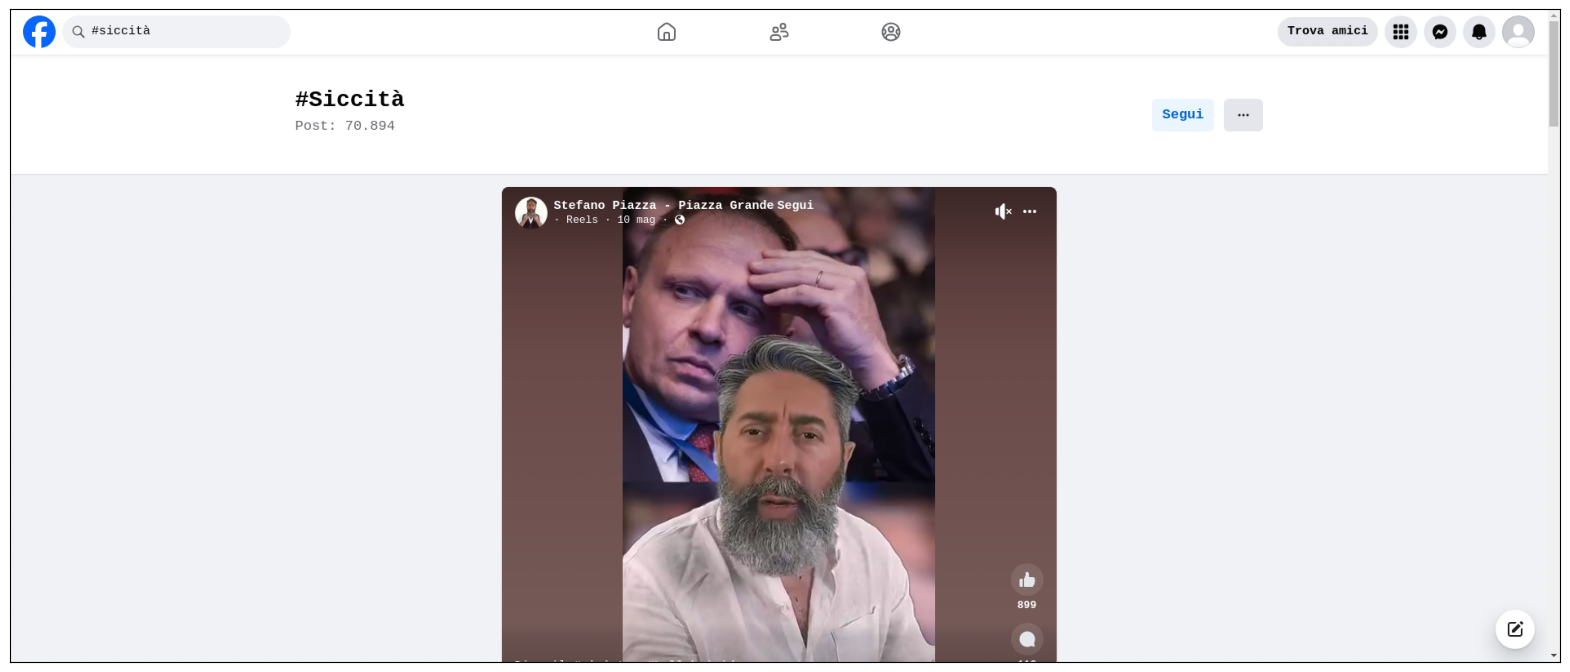

In [12]:
wd.save_screenshot('screenshot.png')

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/screenshot.png')
plt.figure(figsize=(20, 10))
imgplot = plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

In [7]:
email = wd.find_elements(By.CSS_SELECTOR, "input.inputtext._55r1.inputtext._1kbt.inputtext._1kbt")[0]
email.send_keys("f.bogazzi@campus.unimib.it")

In [8]:
password = wd.find_elements(By.CSS_SELECTOR, "input.inputtext._55r1.inputtext._9npi.inputtext._9npi")[0]
password.send_keys("ProgettoMaster24")

In [9]:
from selenium.webdriver.common.keys import Keys
email.send_keys(Keys.RETURN)

In [10]:
search = wd.find_elements(By.CSS_SELECTOR, "input.x1i10hfl.xggy1nq.x1s07b3s.x1kdt53j.x1yc453h.xhb22t3.xb5gni.xcj1dhv.x2s2ed0.xq33zhf.xjyslct.xjbqb8w.xnwf7zb.x40j3uw.x1s7lred.x15gyhx8.x972fbf.xcfux6l.x1qhh985.xm0m39n.x9f619.xzsf02u.xdl72j9.x1iyjqo2.xs83m0k.xjb2p0i.x6prxxf.xeuugli.x1a2a7pz.x1n2onr6.x15h3p50.xm7lytj.x1sxyh0.xdvlbce.xurb0ha.x1vqgdyp.x1xtgk1k.x17hph69.xo6swyp.x1ad04t7.x1glnyev.x1ix68h3.x19gujb8")[0]
search.send_keys("#siccità")

In [11]:
search.send_keys(Keys.RETURN)

INIZIO SCRAPING

In [61]:
#div sia post che reel
post_reel = wd.find_elements(By.CSS_SELECTOR, "div.x1yztbdb.x1n2onr6.xh8yej3.x1ja2u2z")
post_reel

[<selenium.webdriver.remote.webelement.WebElement (session="a98ba9ae2a3605cc31094adb5bc6e7b9", element="f.5ADA0DF232B83BE263D6BD7A3BA03383.d.8EAAF4D3FE1BEB0F768F3AB26822352A.e.69")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a98ba9ae2a3605cc31094adb5bc6e7b9", element="f.5ADA0DF232B83BE263D6BD7A3BA03383.d.8EAAF4D3FE1BEB0F768F3AB26822352A.e.70")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a98ba9ae2a3605cc31094adb5bc6e7b9", element="f.5ADA0DF232B83BE263D6BD7A3BA03383.d.8EAAF4D3FE1BEB0F768F3AB26822352A.e.71")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a98ba9ae2a3605cc31094adb5bc6e7b9", element="f.5ADA0DF232B83BE263D6BD7A3BA03383.d.8EAAF4D3FE1BEB0F768F3AB26822352A.e.72")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a98ba9ae2a3605cc31094adb5bc6e7b9", element="f.5ADA0DF232B83BE263D6BD7A3BA03383.d.8EAAF4D3FE1BEB0F768F3AB26822352A.e.73")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a98ba9ae2a3605cc31094adb5

In [29]:
#div testo
text = wd.find_elements(By.CSS_SELECTOR, "div.xdj266r.x11i5rnm.xat24cr.x1mh8g0r.x1vvkbs.x126k92a")[5].text
text

' Il lago di Pergusa è scomparso, o meglio è così se si intende come lago un luogo depresso che contiene una certa quantità di acqua e che viene continuamente alimentato dai suoi affluenti. Questo bacino lacustre dell’entroterra siciliano, infatti, da qualche giorno non contiene più acqua. '

In [24]:
#div commenti, condivisioni, likes reel
comment_r = wd.find_elements(By.CSS_SELECTOR, "div.x1ey2m1c.x78zum5.xds687c.xjkvuk6.x10l6tqk.xni59qk")[0].text
comment_r

'899\n112\n578'

In [31]:
#div commenti, condivisioni, likes post
comment_p = wd.find_elements(By.CSS_SELECTOR, "div.x6s0dn4.xi81zsa.x78zum5.x6prxxf.x13a6bvl.xvq8zen.xdj266r.xat24cr.x1d52u69.xktsk01.x889kno.x1a8lsjc.xkhd6sd.x4uap5.x80vd3b.x1q0q8m5.xso031l")[2].text
comment_p

'Tutte le reazioni:\n679\n679\nCommenti: 348\nCondivisioni: 448'

In [62]:
#imposta se continuare da dove si è fermato. se true ricomincia
start_scrape = True
if start_scrape == True:
  columns = ['count','testo'] #'interazioni']
  #Crea un DataFrame vuoto con le colonne definite
  df_posts = pd.DataFrame(columns=columns)
  wd.execute_script("window.scrollTo(0, 0);")

In [63]:
# SCRAPING
post_reel = wd.find_elements(By.CSS_SELECTOR, "div.x1yztbdb.x1n2onr6.xh8yej3.x1ja2u2z")

post_reel_saved = set()
insert_has_done = True
num_attempt = 0
count = 0

while insert_has_done == True or num_attempt == 1:
  insert_has_done = False
  for post in post_reel:
    if post.id not in post_reel_saved:
      try:
        count += 1
        testo = post.find_element(By.CSS_SELECTOR, 'div.xdj266r.x11i5rnm.xat24cr.x1mh8g0r.x1vvkbs.x126k92a').text
        #interazioni = post.find_element(By.CSS_SELECTOR, 'div.x1ey2m1c.x78zum5.xds687c.xjkvuk6.x10l6tqk.xni59qk').text
        row = [count, testo] #interazioni]
        df_posts.loc[len(df_posts)] = row
        print(len(df_posts))
        insert_has_done = True
        num_attempt = 0
        post_reel_saved.add(post.id)
      except NoSuchElementException:
        pass
        #print('Pubblicità')
        #print('--------------')
  if insert_has_done == False:
    num_attempt = num_attempt + 1

  wd.execute_script("window.scrollBy(0, 1000);")
  post_reel = wd.find_elements(By.CSS_SELECTOR, "div.x1yztbdb.x1n2onr6.xh8yej3.x1ja2u2z")
  random_number = random.uniform(1.5, 3.5)
  time.sleep(random_number)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [64]:
df_posts

,count,testo
0,1,Dice il #ministro #Lollobrigida:\nFortuna che ...
1,2,La #Sicilia è in emergenza #siccità e la #dest...
2,3,"Da quando mi sono trasferito in via Randone, h..."
3,4,CON QUESTO TRUCCO NON DOVRETE PIÙ INNAFFIARE L...
4,5,"Non ci credo, eppure lo ha detto davvero! #min..."
5,6,"Il lago di Pergusa è scomparso, o meglio è co..."
6,7,Lo sapevi che servirebbero 50 giorni con 15 mi...
7,8,Diventa un mago dei pomodori 🍅
8,9,Allarme siccità in Sicilia. Il Lago Rosamarina...
9,10,"Una minuscola pozza d'acqua stagnante, questo ..."


In [ ]:
post = posts[0]
post.id

'f.480F1556170EEA7264C33BD0B823137C.d.957698262DB8BA34C2094B571906710A.e.70'

In [ ]:
altro = wd.find_elements(By.CSS_SELECTOR,
                         "div.x1i10hfl.xjbqb8w.x1ejq31n.xd10rxx.x1sy0etr.x17r0tee.x972fbf.xcfux6l.x1qhh985.xm0m39n.x9f619.x1ypdohk.xt0psk2.xe8uvvx.xdj266r.x11i5rnm.xat24cr.x1mh8g0r.xexx8yu.x4uap5.x18d9i69.xkhd6sd.x16tdsg8.x1hl2dhg.xggy1nq.x1a2a7pz.x1sur9pj.xkrqix3.xzsf02u.x1s688f")[0].click()

In [ ]:
altri = wd.find_elements(By.CSS_SELECTOR, "div.x1i10hfl.xjbqb8w.x1ejq31n.xd10rxx.x1sy0etr.x17r0tee.x972fbf.xcfux6l.x1qhh985.xm0m39n.x9f619.x1ypdohk.xt0psk2.xe8uvvx.xdj266r.x11i5rnm.xat24cr.x1mh8g0r.xexx8yu.x4uap5.x18d9i69.xkhd6sd.x16tdsg8.x1hl2dhg.xggy1nq.x1a2a7pz.x1sur9pj.xkrqix3.xzsf02u.x1s688f")
for altro in altri:
  altro.click()

In [ ]:
video = wd.find_elements(By.CSS_SELECTOR, "div.xyamay9.x1pi30zi.xjkvuk6.x1swvt13.x1rz3hdg")
for post in video:
  wd.find_elements(By.CSS_SELECTOR, "div.x1i10hfl.x1i10hfl.xjbqb8w.x1ejq31n.xd10rxx.x1sy0etr.x17r0tee.x972fbf.xcfux6l.x1qhh985.xm0m39n.x9f619.x1ypdohk.xt0psk2.xe8uvvx.xdj266r.x11i5rnm.xat24cr.x1mh8g0r.xexx8yu.x4uap5.x18d9i69.xkhd6sd.x16tdsg8.x1hl2dhg.xggy1nq.x1a2a7pz.x1sur9pj.xkrqix3.xzsf02u.x1s688f")[0].click()

In [ ]:
posts = wd.find_elements(By.CSS_SELECTOR, "div.x1iorvi4.x1pi30zi.x1l90r2v.x1swvt13")
for post in posts:
  print(post.text)
  print("------------------------------------------------------------")

La situazione incendi è drammatica e i CITTADINI SICILIANI NON NE SONO AL CORRENTE!  
Gli screenshot che vedete sono di gruppi di volontari che cercano con ogni mezzo possibile di proteggere il nostro ambiente e le nostre vite, il nostro futuro e la nostra economia.
Fenice Verde risponde all'appello di unirsi, di fare PRESSIONE SOCIALE e coordinarsi a livello regionale. Daremo il nostro contributo tecnico e, se ci aiutate, a DIVULGARE IL PIÙ POSSIBILE LE INFORMAZIONI.… Altro...
------------------------------------------------------------
 Posada 
Solidarietà alla popolazione della Baronia per la mancanza di acqua. Purtroppo non piovendo l’Agenzia Forestas é costretta a portare acqua con delle Autobotti
.
.
Grazie per il 
 Peppe Porcu
@… Altro...
------------------------------------------------------------
Recente vendita in costruzione, completata e consegnata con prato sintetico, visto l’infausta meteorologia che affligge il nostro territorio 
#budoni #vendita #meteo #sardegna #siccit

In [ ]:
posts2 = wd.find_elements(By.CSS_SELECTOR, "div.xyamay9.x1pi30zi.xjkvuk6.x1swvt13.x1rz3hdg")
for post in posts2:
  print(post.text)
  print("------------------------------------------------------------")

Ho la soluzione per l’emergenza idrica
Vieni da noi👇🏻
📍… Altro...
------------------------------------------------------------
Contro l’emergenza siccità che sta mettendo in ginocchio l’isola si scava alla ricerca di acqua da utilizzare nelle campagne e nelle abitazioni. La si… Altro...
------------------------------------------------------------
Dice il #ministro #Lollobrigida:
Fortuna che la #siccità colpisce la #Sicilia e non il Piemonte dove si produce vino di qualità.
------------------------------------------------------------
Ma #agricoltori e #allevatori devono ricorrere all’associazione privata per i danni derivanti dalla #siccità, come ha consigliato #NelloMusumeci, la … Altro...
------------------------------------------------------------


In [ ]:
posts2 = wd.find_elements(By.CSS_SELECTOR, "div.xyamay9.x1pi30zi.xjkvuk6.x1swvt13.x1rz3hdg")[0].text
posts2

"Una minuscola pozza d'acqua stagnante, questo è quello che resta del Lago di Pergusa, in provincia di Enna, in Sicilia. Prima di essere prosciugato da… Altro..."